In [1]:
# Working code that finds the pixel scaling in arc seconds per pixel

# First used for SDSSJ1330 (which has the same proposal ID as RXJ0911)

import astropy.io.fits as fits

def get_pixel_scale(fits_file_path):
    """
    Extract the pixel scale from a FITS file and convert it to arcseconds per pixel.

    Parameters:
    fits_file_path (str): The path to the FITS file.

    Returns:
    float: Pixel scale in arcseconds per pixel, or None if not determinable.
    """
    try:
        # Open the FITS file
        with fits.open(fits_file_path) as hdul:
            header = hdul[1].header

            # Check for CD1_1 and CD2_2 keywords first
            if 'CD1_1' in header and 'CD2_2' in header:
                pixel_scale_x = abs(header['CD1_1']) * 3600  # convert from degrees to arcseconds
                pixel_scale_y = abs(header['CD2_2']) * 3600  # convert from degrees to arcseconds
            # If not available, check for CDELT1 and CDELT2
            elif 'CDELT1' in header and 'CDELT2' in header:
                pixel_scale_x = abs(header['CDELT1']) * 3600
                pixel_scale_y = abs(header['CDELT2']) * 3600
            else:
                return None  # Pixel scale not found

            # Return the average of the pixel scales if both axes are present
            return (pixel_scale_x + pixel_scale_y) / 2.0
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
fits_file_path = "/Users/ainsleylewis/Documents/Astronomy/HPC/Lensing/Simulations/Input/Neirenberg/WGDJ0405_cropped.fits"
pixel_scale = get_pixel_scale(fits_file_path)
if pixel_scale:
    print(f"Pixel scale: {pixel_scale} arcseconds/pixel")
else:
    print("Pixel scale could not be determined from the FITS file.")

An error occurred: list index out of range
Pixel scale could not be determined from the FITS file.


In [16]:
# Working code that finds the pixel scaling in arc seconds per pixel
# and converts pixel distances to arc seconds

# First used for SDSSJ1330 (which has the same proposal ID as RXJ0911)

import astropy.io.fits as fits

def get_pixel_scale(fits_file_path):
    """
    Extract the pixel scale from a FITS file and convert it to arcseconds per pixel.

    Parameters:
    fits_file_path (str): The path to the FITS file.

    Returns:
    float: Pixel scale in arcseconds per pixel, or None if not determinable.
    """
    try:
        # Open the FITS file
        with fits.open(fits_file_path) as hdul:
            header = hdul[0].header

            # Check for CD1_1 and CD2_2 keywords first
            if 'CD1_1' in header and 'CD2_2' in header:
                pixel_scale_x = abs(header['CD1_1']) * 3600  # convert from degrees to arcseconds
                pixel_scale_y = abs(header['CD2_2']) * 3600  # convert from degrees to arcseconds
            # If not available, check for CDELT1 and CDELT2
            elif 'CDELT1' in header and 'CDELT2' in header:
                pixel_scale_x = abs(header['CDELT1']) * 3600
                pixel_scale_y = abs(header['CDELT2']) * 3600
            else:
                return None  # Pixel scale not found
                print("Pixel scale not found in FITS header.")

            # Return the average of the pixel scales if both axes are present
            return (pixel_scale_x + pixel_scale_y) / 2.0
        
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def pixels_to_arcseconds(num_pixels, pixel_scale):
    """
    Convert a number of pixels to arc seconds using the pixel scale.

    Parameters:
    num_pixels (float): Number of pixels to convert.
    pixel_scale (float): Pixel scale in arcseconds per pixel.

    Returns:
    float: Distance in arc seconds.
    """
    return num_pixels * pixel_scale

# Example usage
fits_file_path = "/Users/ainsleylewis/Documents/Astronomy/HPC/Lensing/Simulations/Input/Neirenberg/WGDJ0405_cropped.fits"
pixel_scale = get_pixel_scale(fits_file_path)

if pixel_scale:
    print(f"Pixel scale: {pixel_scale:.4f} arcseconds/pixel")
    
    # Manual input for number of pixels [For WGD2038: (From model:24.144 => 0.5131 arc seconds) (From image/eye: 11.505257 => 0.2445 arc seconds)]
    num_pixels = 7.145  # Change this value to whatever number of pixels you want to convert
    arcseconds = pixels_to_arcseconds(num_pixels, pixel_scale)
    print(f"{num_pixels} pixels = {arcseconds:.4f} arc seconds")
    
else:
    print("Pixel scale could not be determined from the FITS file.")

Pixel scale: 0.0938 arcseconds/pixel
7.145 pixels = 0.6702 arc seconds


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
columns = ['x', 'y', 'mag', 'pos_err', 'flux_err', 'other1', 'other2', 'other3']
obs_point = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/HPC/Lensing/Simulations/Input/Neirenberg/Eobs_point.dat', delim_whitespace=True, header=None, names=columns, skiprows=1)
obs_point

,x,y,mag,pos_err,flux_err,other1,other2,other3
0,0.708,-0.244,0.0,0.005,0.0,0.0,0.0,0.0
1,-0.358,-0.567,0.0,0.005,0.0,0.0,0.0,0.0
2,0.363,0.592,0.0,0.005,0.0,0.0,0.0,0.0
3,-0.515,0.454,0.0,0.005,0.0,0.0,0.0,0.0


In [28]:
# x and y from sersic fits 
X = 83.2914
Y = 60.5376

x_image_1 = 84
y_image_1 = 66.0013
x_image_2 = 78.0287
y_image_2 = 61.0143
x_image_3 = 81.9879
y_image_3 = 54.9781
x_image_4 = 88.9977
y_image_4 = 58.0287

x_pixel_offset_1 = x_image_1 - X
y_pixel_offset_1 = y_image_1 - Y

x_pixel_offset_2 = X - x_image_2
y_pixel_offset_2 = Y - y_image_2

x_arcsec_offset_1 = x_pixel_offset_1 * pixel_scale
y_arcsec_offset_1 = y_pixel_offset_1 * pixel_scale

x_arcsec_offset_2 = x_pixel_offset_2 * pixel_scale
y_arcsec_offset_2 = y_pixel_offset_2 * pixel_scale

sers_x_1 = obs_point['x'][1] + x_arcsec_offset_1
sers_y_1 = obs_point['y'][1] + y_arcsec_offset_1

sers_x_2 = obs_point['x'][0] - x_arcsec_offset_2
sers_y_2 = obs_point['y'][0] - y_arcsec_offset_2

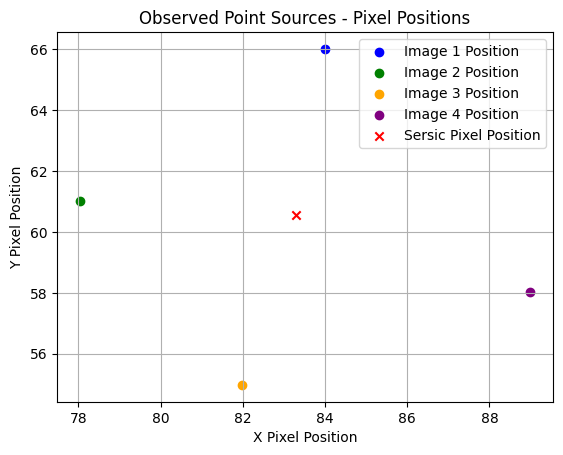

In [10]:
plt.scatter(x_image_1, y_image_1, color='blue', marker='o', label='Image 1 Position')
plt.scatter(x_image_2, y_image_2, color='green', marker='o', label='Image 2 Position')
plt.scatter(x_image_3, y_image_3, color='orange', marker='o', label='Image 3 Position')
plt.scatter(x_image_4, y_image_4, color='purple', marker='o', label='Image 4 Position')
plt.scatter(X, Y, color='red', marker='x', label='Sersic Pixel Position')
plt.xlabel('X Pixel Position')
plt.ylabel('Y Pixel Position')
plt.title('Observed Point Sources - Pixel Positions')
plt.legend()
plt.grid()
plt.show()

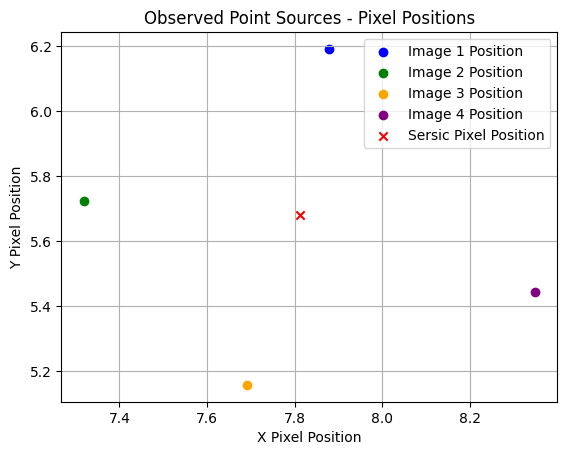

In [11]:
plt.scatter(x_image_1 * pixel_scale, y_image_1 * pixel_scale, color='blue', marker='o', label='Image 1 Position')
plt.scatter(x_image_2 * pixel_scale, y_image_2 * pixel_scale, color='green', marker='o', label='Image 2 Position')
plt.scatter(x_image_3 * pixel_scale, y_image_3 * pixel_scale, color='orange', marker='o', label='Image 3 Position')
plt.scatter(x_image_4 * pixel_scale, y_image_4 * pixel_scale, color='purple', marker='o', label='Image 4 Position')
plt.scatter(X * pixel_scale, Y * pixel_scale, color='red', marker='x', label='Sersic Pixel Position')
plt.xlabel('X Pixel Position')
plt.ylabel('Y Pixel Position')
plt.title('Observed Point Sources - Pixel Positions')
plt.legend()
plt.grid()
plt.show()

In [22]:
x_diff_2 = (x_image_1 * pixel_scale) - obs_point['x'][2]
y_diff_2 = (y_image_1 * pixel_scale) - obs_point['y'][2]
print(f"x difference: {x_diff_2} arcseconds")
print(f"y difference: {y_diff_2} arcseconds")

x difference: 7.516004020833513 arcseconds
y difference: 5.598767953336179 arcseconds


In [23]:
x_diff_3 = (x_image_2 * pixel_scale) - obs_point['x'][3]
y_diff_3 = (y_image_2 * pixel_scale) - obs_point['y'][3]
print(f"x difference: {x_diff_3} arcseconds")
print(f"y difference: {y_diff_3} arcseconds")

x difference: 7.833910012385857 arcseconds
y difference: 5.268998988432647 arcseconds


In [24]:
x_diff_1 = (x_image_3 * pixel_scale) - obs_point['x'][1]
y_diff_1 = (y_image_3 * pixel_scale) - obs_point['y'][1]
print(f"x difference: {x_diff_1} arcseconds")
print(f"y difference: {y_diff_1} arcseconds")

x difference: 8.048273735234476 arcseconds
y difference: 5.723817511402227 arcseconds


In [25]:
x_diff_4 = (x_image_4 * pixel_scale) - obs_point['x'][0]
y_diff_4 = (y_image_4 * pixel_scale) - obs_point['y'][0]
print(f"x difference: {x_diff_4} arcseconds")
print(f"y difference: {y_diff_4} arcseconds")

x difference: 7.639776620773032 arcseconds
y difference: 5.686956674092164 arcseconds


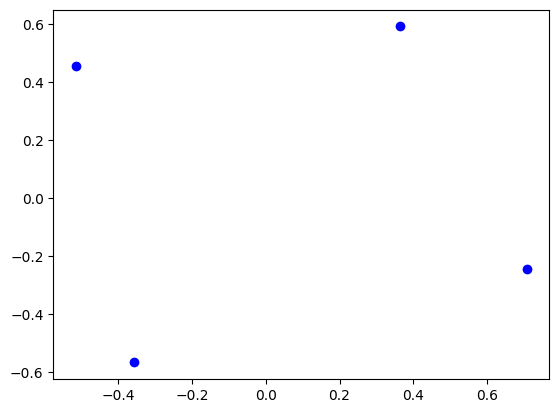

In [17]:
plt.scatter(obs_point['x'], obs_point['y'], color='blue', marker='o', label='Observed Positions')

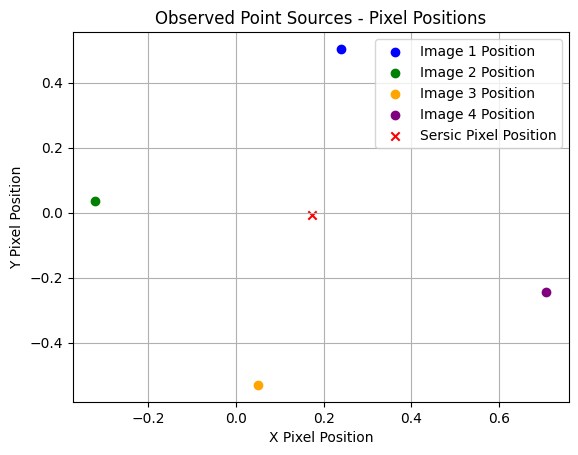

In [26]:
plt.scatter((x_image_1 * pixel_scale) - x_diff, (y_image_1 * pixel_scale) - y_diff, color='blue', marker='o', label='Image 1 Position')
plt.scatter((x_image_2 * pixel_scale) - x_diff, (y_image_2 * pixel_scale) - y_diff, color='green', marker='o', label='Image 2 Position')
plt.scatter((x_image_3 * pixel_scale) - x_diff, (y_image_3 * pixel_scale) - y_diff, color='orange', marker='o', label='Image 3 Position')
plt.scatter((x_image_4 * pixel_scale) - x_diff, (y_image_4 * pixel_scale) - y_diff, color='purple', marker='o', label='Image 4 Position')
plt.scatter((X * pixel_scale) - x_diff, (Y * pixel_scale) - y_diff, color='red', marker='x', label='Sersic Pixel Position')
plt.xlabel('X Pixel Position')
plt.ylabel('Y Pixel Position')
plt.title('Observed Point Sources - Pixel Positions')
plt.legend()
plt.grid()
plt.show()

In [27]:
sers_x_1 = (X * pixel_scale) - x_diff_2
sers_y_1 = (Y * pixel_scale) - y_diff_2
print(sers_x_1, sers_y_1)
sers_x_2 = (X * pixel_scale) - x_diff_4
sers_y_2 = (Y * pixel_scale) - y_diff_4
print(sers_x_2, sers_y_2)
sers_x_3 = (X * pixel_scale) - x_diff_1
sers_y_3 = (Y * pixel_scale) - y_diff_1
print(sers_x_3, sers_y_3)
sers_x_4 = (X * pixel_scale) - x_diff_3
sers_y_4 = (Y * pixel_scale) - y_diff_3
print(sers_x_4, sers_y_4)

0.2965349732242544 0.07951768727823616
0.1727623732847352 -0.008671033477748225
-0.23573474117670834 -0.04553187078781118
-0.02137101832808952 0.40928665218176885


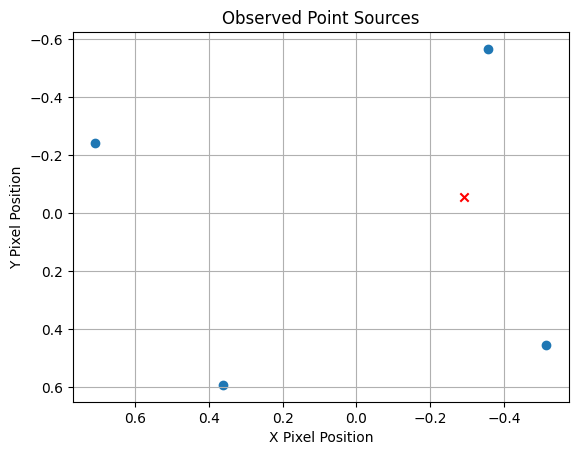

In [29]:
plt.scatter(obs_point['x'], obs_point['y'])
plt.scatter(sers_x_1, sers_y_1, color='red', marker='x', label='Sersic Position')
# plt.scatter(sers_x_2, sers_y_2, color='blue', marker='x', label='Sersic Position 2')
plt.xlabel('X Pixel Position')
plt.ylabel('Y Pixel Position')
plt.title('Observed Point Sources')
plt.grid()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
# plt.xlim(5.0, -5.0)
# plt.ylim(3.0, -3.0)
plt.show()

In [ ]:

plt.scatter(obs_point['x_pixel'], obs_point['y_pixel'], color='red', marker='x', label='Adjusted Pixel Position')
plt.scatter(X, Y, color='blue', marker='o', label='Sersic Pixel Position')
plt.xlabel('X Pixel Position')
plt.ylabel('Y Pixel Position')
plt.title('Observed Point Sources - Adjusted Pixel Positions')
plt.grid()

In [ ]:
image_data = fits.open('/Users/ainsleylewis/Documents/Astronomy/HPC/Lensing/Simulations/Input/Neirenberg/WGDJ0405_cropped.fits')
image_data = image_data[0].data


In [ ]:
# Convert image_data to arcseconds
plt.figure(figsize=(12, 12))
plt.imshow(image_data, cmap='gray', origin='lower')
plt.scatter(X, Y, color='red', marker='x', label='Sersic Position')
plt.scatter(x_image, y_image, color='blue', marker='o', label='Image Position')
plt.legend()

In [ ]:
# Show image in arcseconds
plt.figure(figsize=(12, 12))
plt.imshow(image_data, cmap='gray', origin='lower', extent=[0, image_data.shape[1]*pixel_scale - x_diff, 0, image_data.shape[0]*pixel_scale - y_diff])
plt.xlabel('Arcseconds')
plt.ylabel('Arcseconds')
plt.scatter(obs_point['x'][1], obs_point['y'][1], color='red', marker='x', label='Sersic Position')
plt.scatter(x_image_arcsec, y_image_arcsec, color='blue', marker='o', label='Image Position')
plt.legend()